In [19]:
import cv2
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz

Takes each frame of the camera video and the mean hue value from the hsv

In [14]:
cap = cv2.VideoCapture('test4.MOV')
values = []

while True:
    try:
        # Take each frame
        _, frame = cap.read()
        # Convert BGR to HSV
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        values.append(cv2.mean(hsv)[0])
    except:
        print('done')
        break

done


Take those values, clean them and put them into a series


In [12]:
values1 = []
first_value = 0
for x in values:
    # forces starting value to 0 
    if len(values1) == 0:
        first_value = x;    
    values1.append(x-first_value)

    #removes the first second or so of data.
values1 = values1[40:]
values1 = pd.Series(values1)   



Just to look at our data 

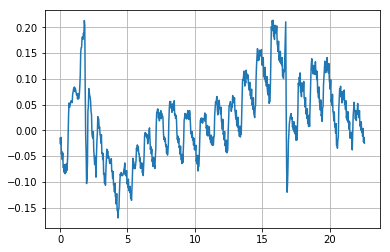

In [15]:

plt.plot(np.arange(0,len(values1)/30,1/30),values1)
plt.xlim()
plt.grid()
plt.show()


Create a butterwidth bandpass filter and look for frequencies between 48 and 80. 
Still need to find a way to accomodate for the big drop at the end.

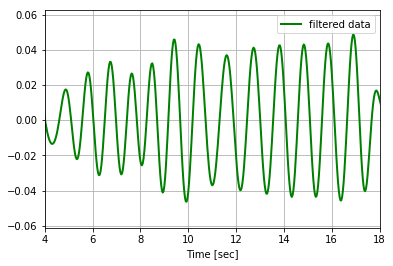

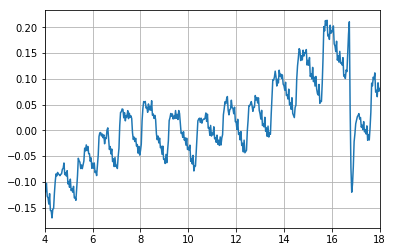

In [20]:
def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


highcut= 1.25;
lowcut = .75;
fs = 30;
order = 4;
y = butter_bandpass_filter(values1, lowcut, highcut, fs, order);
t=np.arange(0,len(values1)/30,1/30)



plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.legend()
plt.grid(which='minor', b=True, color='b')

plt.grid(which='major')
plt.axis('tight')
plt.xlim(4,18)
plt.subplots_adjust(hspace=0.35)
plt.show()

plt.plot(np.arange(0,len(values1)/30,1/30),values1)
plt.xlim(4,18)
plt.grid()
plt.show()